C:\Users\rayya\AppData\Local\Temp\ipykernel_23588\1381226059.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


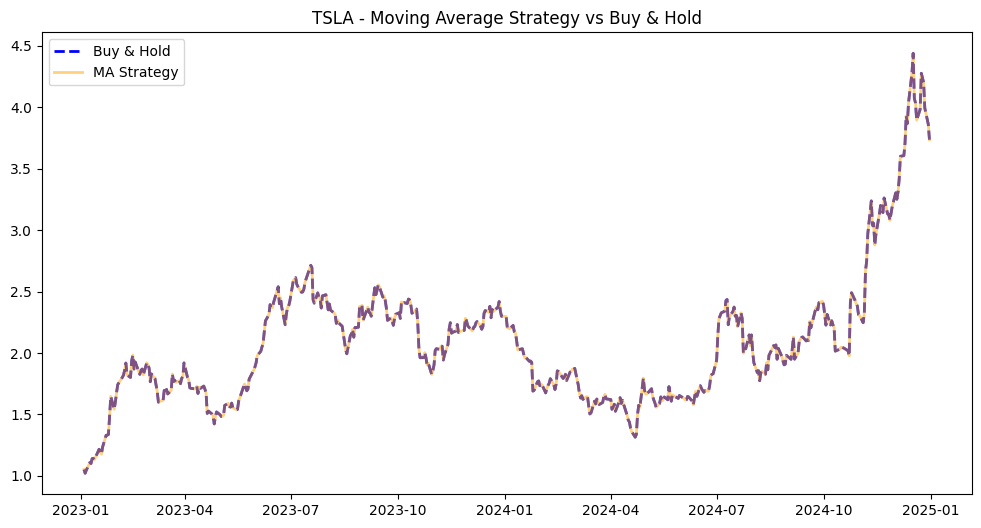

Buy & Hold Return. 2.7358
Strategy Return. 2.7358
Date
2024-12-24    4.276411
2024-12-26    4.201018
2024-12-27    3.993155
2024-12-30    3.861332
2024-12-31    3.735800
Name: Cumulative Market Return, dtype: float64
Date
2024-12-24    4.276411
2024-12-26    4.201018
2024-12-27    3.993155
2024-12-30    3.861332
2024-12-31    3.735800
Name: Cumulative Strategy Return, dtype: float64


In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "TSLA"
data = yf.download(ticker, start="2023-01-01", end="2025-01-01")

data["MA20"] = data["Close"].rolling(window=20).mean()
data["MA50"] = data["Close"].rolling(window=50).mean()

data["Signal"] = 0
data.loc[data["MA20"] > data["MA50"], "Signal"] = 1

data["Daily Return"] = data["Close"].pct_change()

data["Strategy Return"] = data["Daily Return"] * data["Signal"].shift(1)

data["Cumulative Market Return"] = (1 + data["Daily Return"]).cumprod()
data["Cumulative Strategy Return"] = (1 + data["Daily Return"]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Cumulative Market Return"], label="Buy & Hold", color="blue", linestyle="--", linewidth=2)
plt.plot(data.index, data["Cumulative Strategy Return"], label="MA Strategy", color="orange", linewidth=2, alpha=0.5)
plt.title(f"{ticker} - Moving Average Strategy vs Buy & Hold")
plt.legend()
plt.show()

print("Buy & Hold Return.", round(data["Cumulative Market Return"].iloc[-1]-1, 4))
print("Strategy Return.", round(data["Cumulative Strategy Return"].iloc[-1]-1, 4))
print(data["Cumulative Market Return"].tail())
print(data["Cumulative Strategy Return"].tail())